# Imports and some parameters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.rcParams['figure.figsize'] = (19, 5)
plt.rcParams['font.size'] = 14

# Load data

In [3]:
# Load data
data = pd.read_csv('train.csv')

# Exploratory data analysis and cleaning

## Cleaning

In [4]:
print(data.head())
print()
print(data.dtypes)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [5]:
data.drop('Row ID', axis=1, inplace=True)
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)
data.sort_values('Order Date', inplace=True)
data.set_index('Order Date', inplace=True)

In [6]:
data.isnull().sum()

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
data[data['Postal Code'].isnull()]
# Postal code is missing for Burlington, Vermont. We can fill it in with the correct value.

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2016-11-08,CA-2016-117086,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28


In [8]:
data[(data['City'] == 'Burlington') & (data['State'] == 'Vermont') & (data['Postal Code'].notnull())]
# The postal code is missing for every row with Burlington, Vermont. Looking it on google:
# Burlington, VT 05401

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,


In [9]:
data['Postal Code'].fillna(5401, inplace=True)

In [10]:
print(data.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


## Some insights

### Top customers

In [11]:
top_20_customers = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)
top_20_customers = top_20_customers.reset_index()
top_20_customers['Sales'] = top_20_customers['Sales'].round(2)
top_20_customers

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


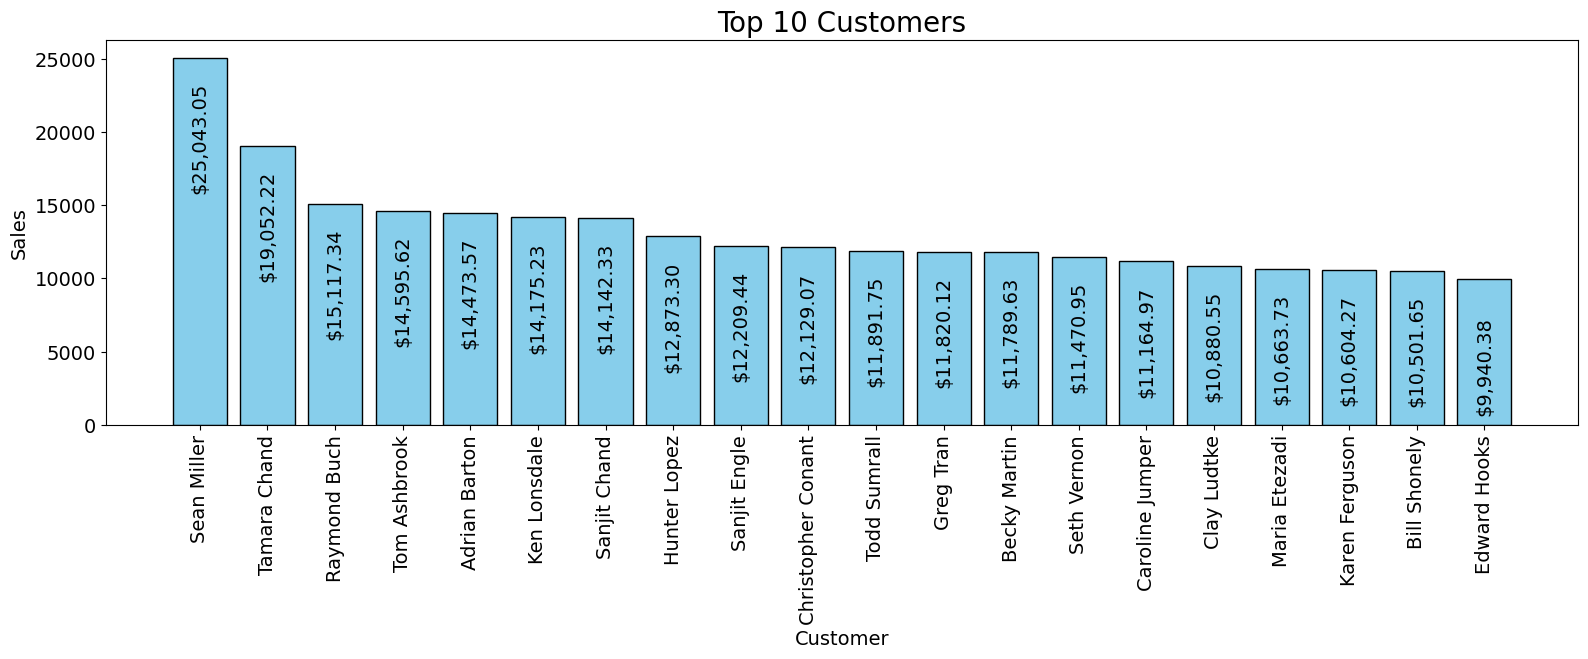

In [12]:
plt.figure()
plt.title("Top 10 Customers", fontsize=20)
plt.bar(top_20_customers['Customer Name'], top_20_customers['Sales'], color='skyblue', edgecolor='black')
plt.ylabel('Sales')
plt.xlabel('Customer')
plt.xticks(rotation=90)
for index, sales in top_20_customers["Sales"].items():
    plt.text(index, sales-9000,f"${sales:,.2f}", fontsize=14, rotation=90, color='k', ha='center')

### Top states

In [13]:
top_states = data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
top_states = top_states.reset_index()
top_states['Sales'] = top_states['Sales'].round(2)
top_states

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


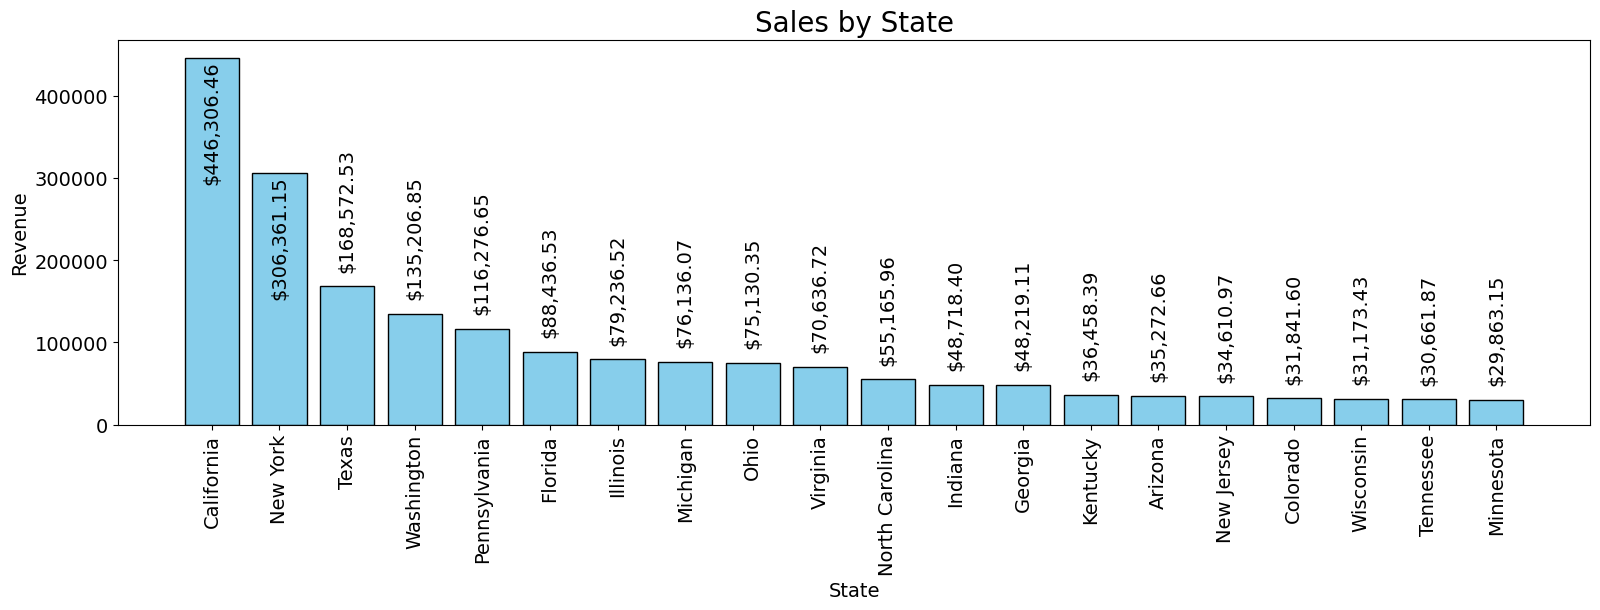

In [14]:
plt.figure()
plt.title("Sales by State", fontsize=20)
plt.bar(top_states['State'], top_states['Sales'], color='skyblue', edgecolor='black')

plt.ylabel('Revenue')
plt.xlabel('State')

plt.xticks(rotation=90)

offset1 = top_states['Sales'].max()/3
offset2 = top_states['Sales'].max()/20

for index, sales in top_states["Sales"].items():
	if sales > top_states['Sales'].max()/2:
		plt.text(index, sales - offset1,f"${sales:,.2f}", fontsize=14, rotation=90, color='k', ha='center')
	else:
		plt.text(index, sales + offset2,f"${sales:,.2f}", fontsize=14, rotation=90, color='k', ha='center')

### Top cities

In [15]:
top_cities = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
top_cities = top_cities.reset_index()
top_cities['Sales'] = top_cities['Sales'].round(2)
top_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


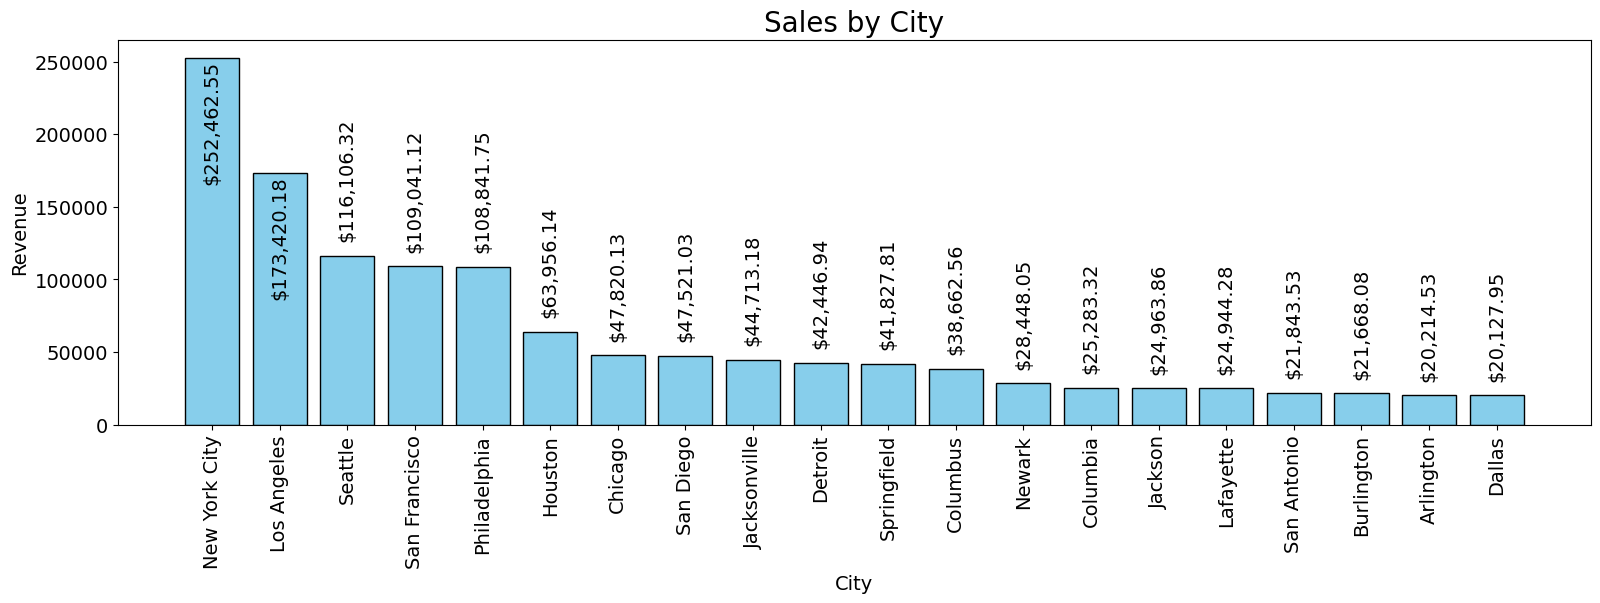

In [16]:
plt.figure()
plt.title("Sales by City", fontsize=20)
plt.bar(top_cities['City'], top_cities['Sales'], color='skyblue', edgecolor='black')

plt.ylabel('Revenue')
plt.xlabel('City')

plt.xticks(rotation=90)

offset1 = top_cities['Sales'].max()/3
offset2 = top_cities['Sales'].max()/20

for index, sales in top_cities['Sales'].items():
	if sales > top_cities['Sales'].max()/2:
		plt.text(index, sales-offset1,f"${sales:,.2f}", fontsize=14, rotation=90, color='k', ha='center')
	else:
		plt.text(index, sales+offset2,f"${sales:,.2f}", fontsize=14, rotation=90, color='k', ha='center')

### Top categories

In [17]:
top_categories = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
top_categories = top_categories.reset_index()
top_categories['Sales'] = top_categories['Sales'].round(2)
top_categories

,Category,Sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


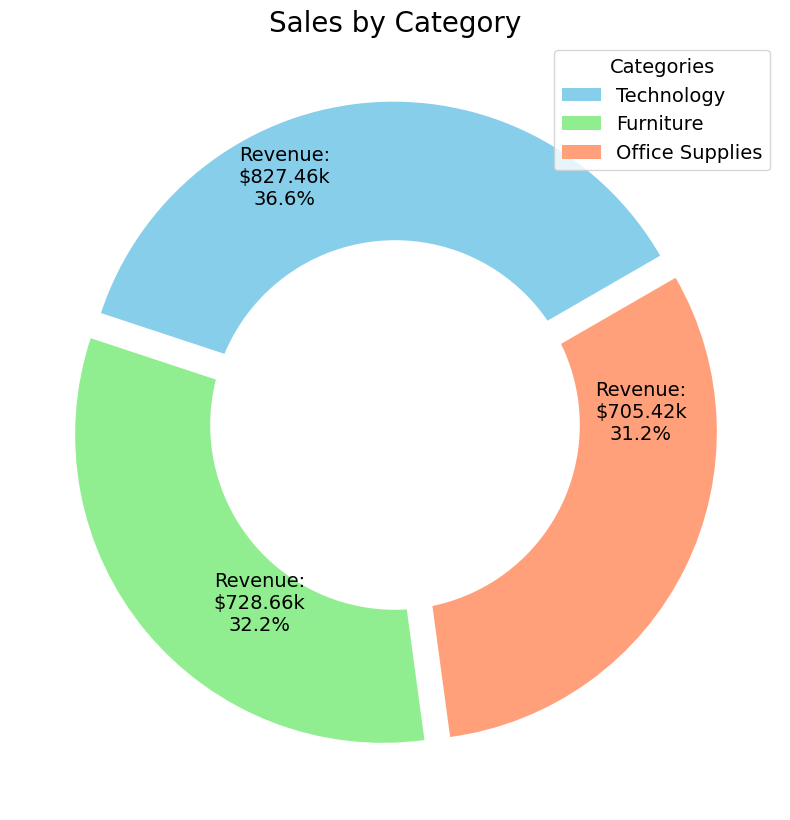

In [18]:
plt.figure(figsize=(12, 10))

plt.title("Sales by Category", fontsize=20)

explode = (0.05, 0.05, 0.05)

plt.pie(top_categories['Sales'], startangle=30, colors=['skyblue', 'lightgreen', 'lightsalmon'], explode=explode)

plt.pie([1], colors=['white'], radius=0.6)

r = 0.8
total_sales = top_categories['Sales'].sum()
for index, sales in top_categories['Sales'].items():
	x = r*np.cos((index/3)*2*np.pi + 90)
	y = r*np.sin((index/3)*2*np.pi + 90)
	plt.text(x, y, f"Revenue:\n${sales/1000:,.2f}k\n{sales/total_sales:.1%}", fontsize=14, color='k', ha='center')

plt.legend(top_categories['Category'], title='Categories', loc='upper right')

### Top subcategory

In [42]:
top_subcat = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
top_subcat = top_subcat.reset_index()
top_subcat['Sales'] = top_subcat['Sales'].round(2)

top_subcat = top_subcat.head(9)
top_subcat.loc[9] = ['Others', data['Sales'].sum() - top_subcat['Sales'].sum()]
top_subcat

,Sub-Category,Sales
0,Phones,327782.4500
1,Chairs,322822.7300
2,Storage,219343.3900
3,Tables,202810.6300
4,Binders,200028.7800
5,Machines,189238.6300
6,Accessories,164186.7000
7,Copiers,146248.0900
8,Bookcases,113813.2000
9,Others,375262.1827


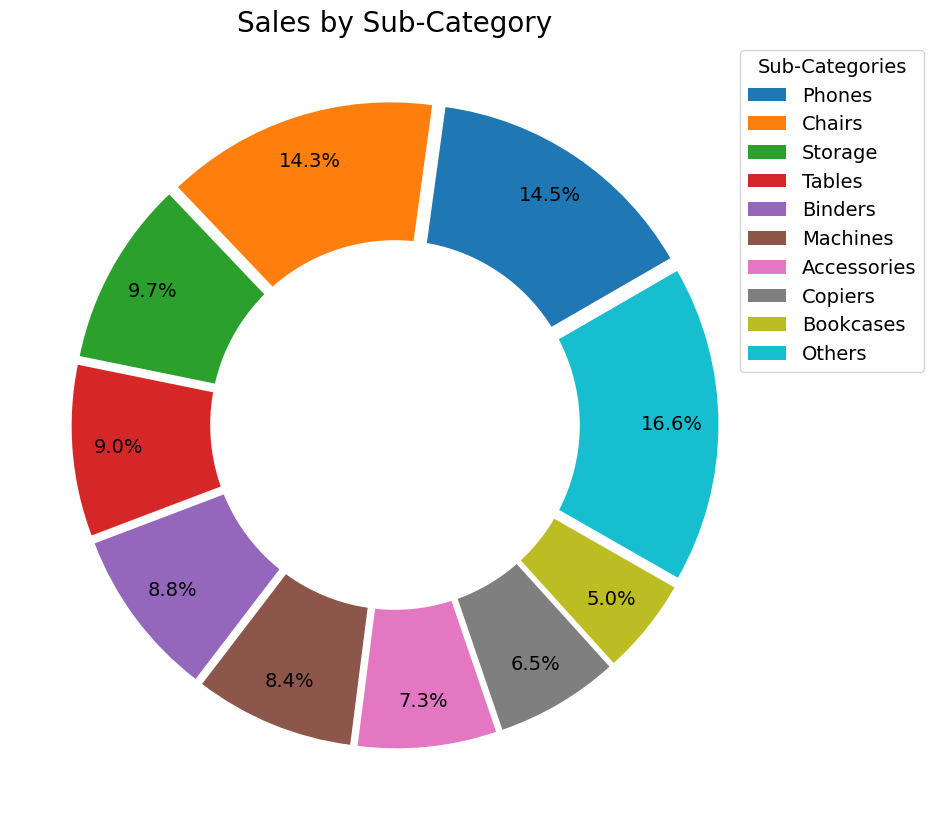

In [49]:
plt.figure(figsize=(12, 10))

plt.title("Sales by Sub-Category", fontsize=20)

plt.pie(top_subcat['Sales'], startangle=30, colors=sns.color_palette("tab10"), autopct='%1.1f%%', pctdistance=0.85, explode=[0.05]*10)

plt.pie([1], colors=['white'], radius=0.6)

plt.legend(top_subcat['Sub-Category'], title='Sub-Categories', loc='upper right', ncol=1, bbox_to_anchor=(1.2, 1))